In [1]:
from classes import MCS_Finder

In [2]:
f = MCS_Finder("Tephrosia")
Cnlist = f.get_Cnlist_from_label2("C1-C1-C1-C8-C8-C8-C8-C8-C8-O")

In [3]:
%%time
f.get_simcomp(Cnlist, "SIMCOMP2/Tephrosia1.txt")

CPU times: user 9.46 ms, sys: 6.97 ms, total: 16.4 ms
Wall time: 10.9 s


True

In [4]:
print(len(Cnlist))

34


In [5]:
import sys
sys.path.append("../../module")

In [6]:
import kcf.converter as kcfco

In [7]:
from nxrd.Compound import Compound

In [8]:
f1 = MCS_Finder("Camellia")
Cnlist = f1.get_Cnlist_from_label2("C-C-C-N-C-N")

In [9]:
complist = []
for i in range(len(Cnlist)):
    complist.append(Compound())
print(complist)
print(len(complist))

[<nxrd.Compound.Compound object at 0x111605390>, <nxrd.Compound.Compound object at 0x111605438>, <nxrd.Compound.Compound object at 0x1116054a8>, <nxrd.Compound.Compound object at 0x111605518>, <nxrd.Compound.Compound object at 0x111605588>]
5


In [10]:
for i, Cn in enumerate(Cnlist):
    complist[i].input_molfile('KNApSAck_mol/%s.mol' % (Cn))
    complist[i].fit2d = False
    print(Cn, i)

C00001492 0
C00001509 1
C00001510 2
C00019660 3
C00034312 4


In [11]:
veclist = [0] * len(Cnlist)

In [12]:
import time
start = time.time()
for i in range(len(Cnlist)):
    print(i)
    print(time.strftime("%X"))
    veclist[i] = kcfco.kcf_vec(complist[i])
print(time.time() - start)

0
10時27分12秒
1
10時27分12秒
2
10時27分12秒
3
10時27分12秒
4
10時27分13秒
0.9217300415039062


約0.9秒で終わった。  

In [44]:
for vec1 in veclist:
    for vec2 in veclist:
        print(kcfco.similarity(vec1, vec2))
    print("\n")

(1.0, 1.0, 1.0)
(0.54326923076923073, 0.66996047430830041, 0.74179431072210067)
(0.58552631578947367, 0.70355731225296447, 0.77729257641921401)
(0.2614942528735632, 0.35968379446640314, 0.489247311827957)
(0.43606138107416881, 0.67391304347826086, 0.55267423014586714)


(0.54326923076923073, 0.74179431072210067, 0.66996047430830041)
(1.0, 1.0, 1.0)
(0.43867924528301888, 0.61050328227571116, 0.60917030567685593)
(0.35457516339869283, 0.474835886214442, 0.58333333333333337)
(0.28776978417266186, 0.52516411378555794, 0.38897893030794167)


(0.58552631578947367, 0.77729257641921401, 0.70355731225296447)
(0.43867924528301888, 0.60917030567685593, 0.61050328227571116)
(1.0, 1.0, 1.0)
(0.3562091503267974, 0.4759825327510917, 0.58602150537634412)
(0.359039190897598, 0.62008733624454149, 0.46029173419773095)


(0.2614942528735632, 0.489247311827957, 0.35968379446640314)
(0.35457516339869283, 0.58333333333333337, 0.474835886214442)
(0.3562091503267974, 0.58602150537634412, 0.4759825327510917)
(1

In [42]:
for vec1 in veclist:
    for vec2 in veclist:
        print(kcfco.similarity(vec1, vec2, levels=[0]))
    print("\n")

(1.0, 1.0, 1.0)
(0.75449101796407181, 0.75449101796407181, 1.0)
(0.77380952380952384, 0.77844311377245512, 0.99236641221374045)
(0.47337278106508873, 0.47904191616766467, 0.97560975609756095)
(0.73796791443850263, 0.82634730538922152, 0.87341772151898733)


(0.77777777777777779, 0.82894736842105265, 0.92647058823529416)
(1.0, 1.0, 1.0)
(0.69871794871794868, 0.71710526315789469, 0.96460176991150437)
(0.5741935483870968, 0.58552631578947367, 0.96739130434782605)
(0.59668508287292821, 0.71052631578947367, 0.78832116788321172)


(0.82278481012658233, 0.8666666666666667, 0.94202898550724634)
(0.72185430463576161, 0.72666666666666668, 0.99090909090909096)
(1.0, 1.0, 1.0)
(0.58278145695364236, 0.58666666666666667, 0.9887640449438202)
(0.6741573033707865, 0.80000000000000004, 0.81081081081081086)


(0.55944055944055948, 0.64516129032258063, 0.80808080808080807)
(0.64963503649635035, 0.717741935483871, 0.87254901960784315)
(0.6470588235294118, 0.70967741935483875, 0.88)
(1.0, 1.0, 1.0)
(0.50318

34/34
edge:48


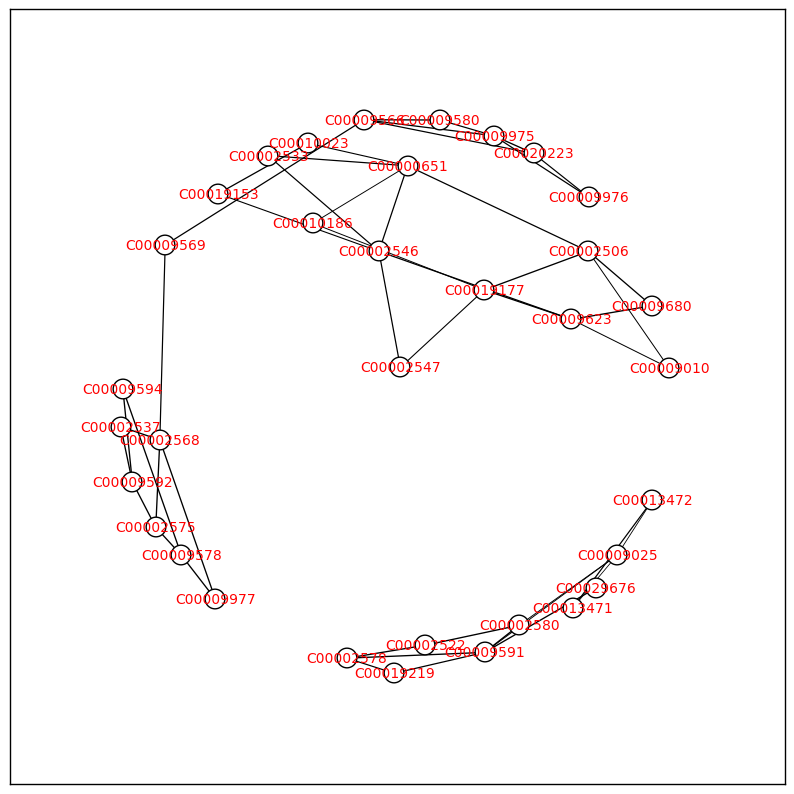

In [16]:
%matplotlib inline
f.make_and_draw_graph("C1-C1-C1-C8-C8-C8-C8-C8-C8-O", "SIMCOMP2/Tephrosia1.txt")

In [17]:
G = f.make_graph2("C1-C1-C1-C8-C8-C8-C8-C8-C8-O", "SIMCOMP2/Tephrosia1.txt")

34/34
edge:48


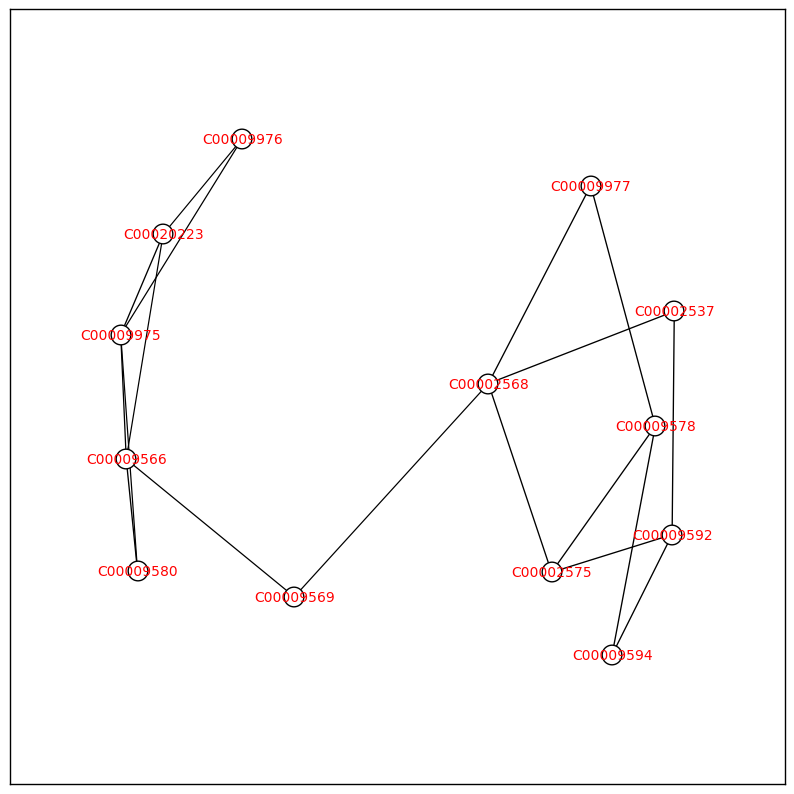

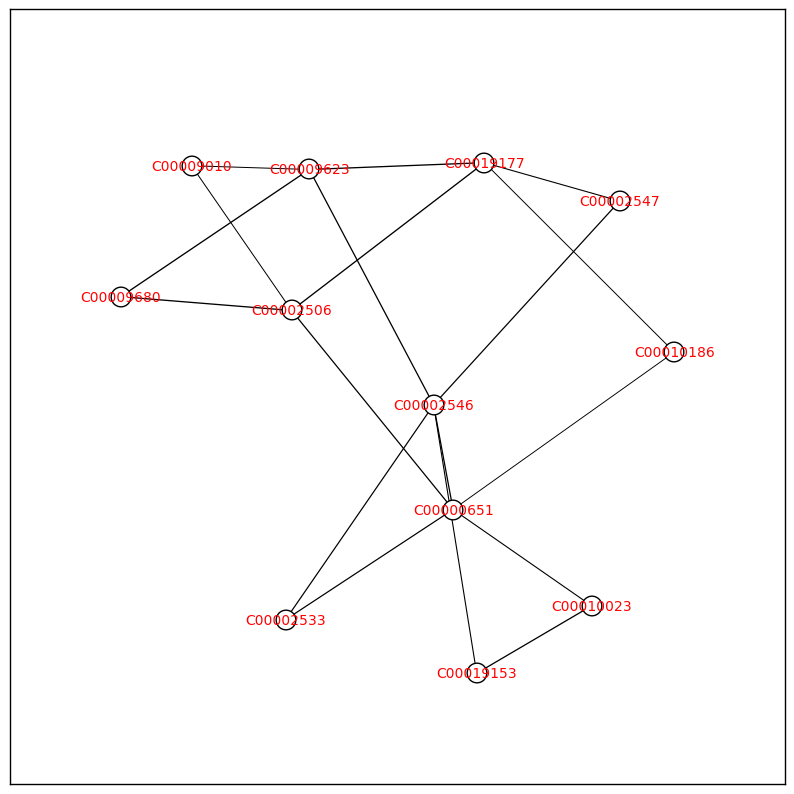

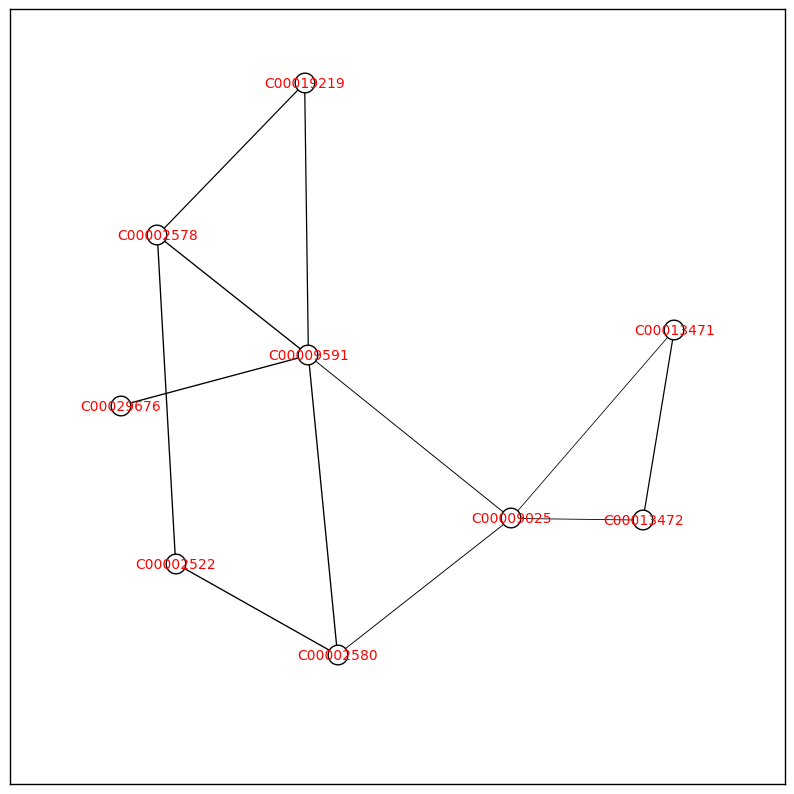

In [18]:
import networkx as nx
for g in nx.connected_component_subgraphs(G):
    f.drawnx(g)

In [19]:
Glist = nx.connected_component_subgraphs(G)

In [20]:
dic = dict()
for g in Glist:
    dic[g] = len(g.nodes())
sortGlist = sorted(dic.items(), key=lambda x: x[1], reverse=True)
print(sortGlist)

[(<networkx.classes.graph.Graph object at 0x114c91908>, 13), (<networkx.classes.graph.Graph object at 0x114c972e8>, 12), (<networkx.classes.graph.Graph object at 0x114c91320>, 9)]


In [21]:
Cnlist1 = sortGlist[1][0].nodes()

In [22]:
print(Cnlist1)

['C00009680', 'C00002533', 'C00002506', 'C00010023', 'C00002547', 'C00019153', 'C00000651', 'C00009623', 'C00009010', 'C00002546', 'C00010186', 'C00019177']


In [23]:
pos = nx.spring_layout(sortGlist[1][0])

In [24]:
def imscatter3(pos, Cnlist1, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    artists = []
    for Cn in Cnlist1:
        filepath = "Tephrosia/" + Cn + ".png"
        image = plt.imread(filepath)
        im = OffsetImage(image, zoom=zoom)
        x, y = np.atleast_1d(pos[Cn][0], pos[Cn][1])
        for x0, y0 in zip(x, y):
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()
    return artists

In [25]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

In [26]:
for Cn in Cnlist1:
    with open('KNApSAck_mol/%s.mol' % Cn)as fi:
        mol = Chem.MolFromMolBlock(fi.read())
        rdDepictor.Compute2DCoords(mol)
        filename = "Tephrosia/%s.png" % Cn
        im = Draw.MolToImage(mol, size=(500, 500))
        trans = Image.new('RGBA', im.size, (0, 0, 0, 0))
        width = im.size[0]
        height = im.size[1]
        for x in range(width):
            for y in range(height):
                pixel = im.getpixel( (x, y) )
        
                # 白なら処理しない
                if pixel[0] == 255 and pixel[1] == 255 and pixel[2] == 255:
                    continue
        
                # 白以外なら、用意した画像にピクセルを書き込み
                trans.putpixel( (x, y), pixel )
        # 透過画像を保存
        trans.save(filename)

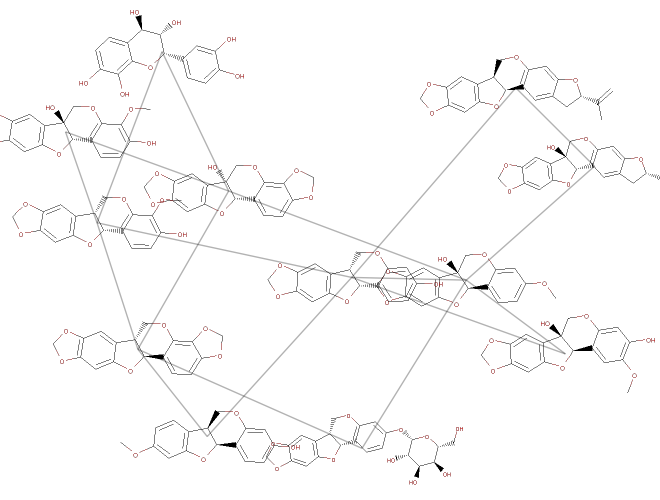

In [27]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('w')
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
ax.spines["right"].set_color("none")  # 右消し
ax.spines["left"].set_color("none")   # 左消し
ax.spines["top"].set_color("none")    # 上消し
ax.spines["bottom"].set_color("none") # 下消し
plt.xticks([])
plt.yticks([])
imscatter3(pos, Cnlist1, zoom=0.5)
nx.draw_networkx_nodes(sortGlist[1][0], pos, with_labels=False, node_size=200, node_shape=",", node_color="w", alpha=0)
nx.draw_networkx_edges(sortGlist[1][0], pos, with_labels=False, alpha=0.3)
plt.savefig("test.png")
plt.show()

In [28]:
from classes import MCS_Finder

In [29]:
f = MCS_Finder("Tephrosia")
Cnlist = f.get_Cnlist_from_label2("C1-C1-C1-C8-C8-C8-C8-C8-C8-O")
G = f.make_graph2("C1-C1-C1-C8-C8-C8-C8-C8-C8-O", "SIMCOMP2/Tephrosia1.txt")

34/34
edge:48


In [30]:
f.make_skeleton(Cnlist)

In [31]:
import networkx as nx

In [32]:
pos = nx.spring_layout(G)

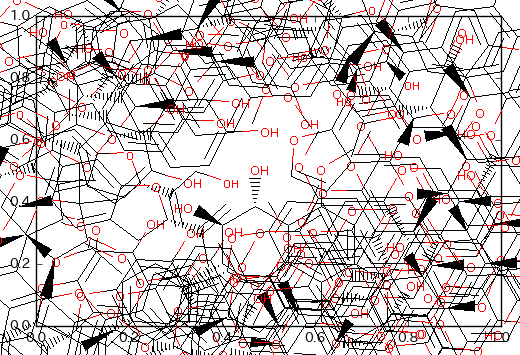

In [33]:
f.imscatter3(pos, Cnlist)

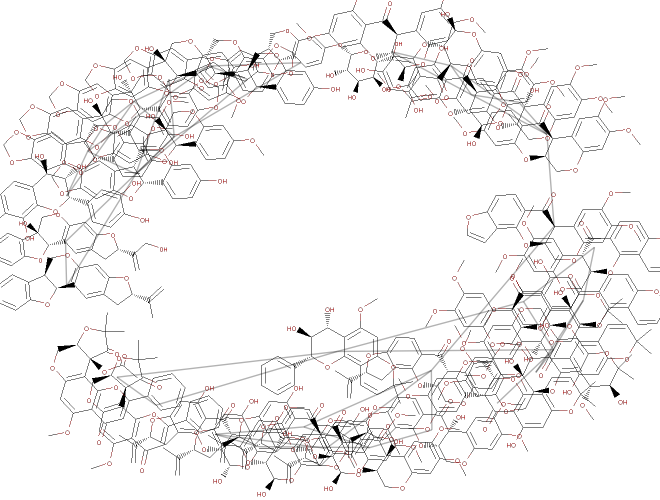

In [34]:
f.plot_with_figure(G, pos, Cnlist)

In [35]:
Glist = nx.connected_component_subgraphs(G)
dic = dict()
for g in Glist:
    dic[g] = len(g.nodes())
sortGlist = sorted(dic.items(), key=lambda x: x[1], reverse=True)
print(sortGlist)
Cnlist1 = sortGlist[1][0].nodes()

[(<networkx.classes.graph.Graph object at 0x111858d68>, 13), (<networkx.classes.graph.Graph object at 0x111858208>, 12), (<networkx.classes.graph.Graph object at 0x111858978>, 9)]


In [36]:
g = sortGlist[1][0]

In [37]:
pos = nx.spring_layout(g)

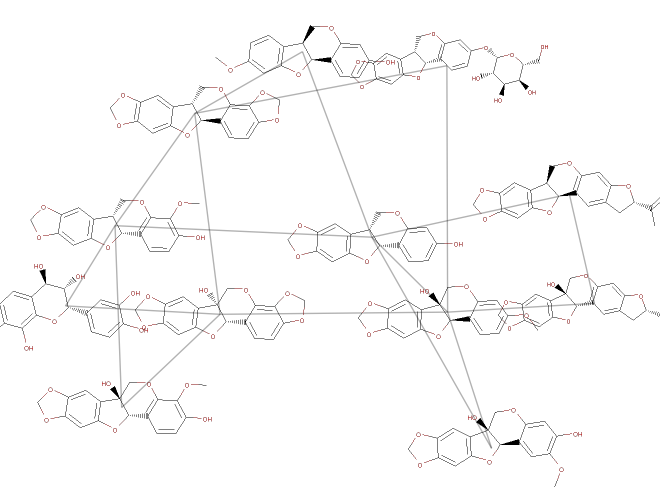

In [38]:
f.plot_with_figure(g, pos, Cnlist1)

In [39]:
f = MCS_Finder("Streptomyces")
Cnlist = f.get_Cnlist_from_label2("C(C)-C(C)-C(C-C-C-C-C-C)-C-C-C-C-C-C-C-C-C")
f.get_simcomp(Cnlist, "SIMCOMP2/Streptomyces1.txt")
G = f.make_graph2("C(C)-C(C)-C(C-C-C-C-C-C)-C-C-C-C-C-C-C-C-C", "SIMCOMP2/Streptomyces1.txt")

20/20
edge:28


In [40]:
Glist = nx.connected_component_subgraphs(G)
dic = dict()
for g in Glist:
    dic[g] = len(g.nodes())
sortGlist = sorted(dic.items(), key=lambda x: x[1], reverse=True)
print(sortGlist)
Cnlist1 = sortGlist[1][0].nodes()

[(<networkx.classes.graph.Graph object at 0x11493cf60>, 15), (<networkx.classes.graph.Graph object at 0x11493ccf8>, 5)]


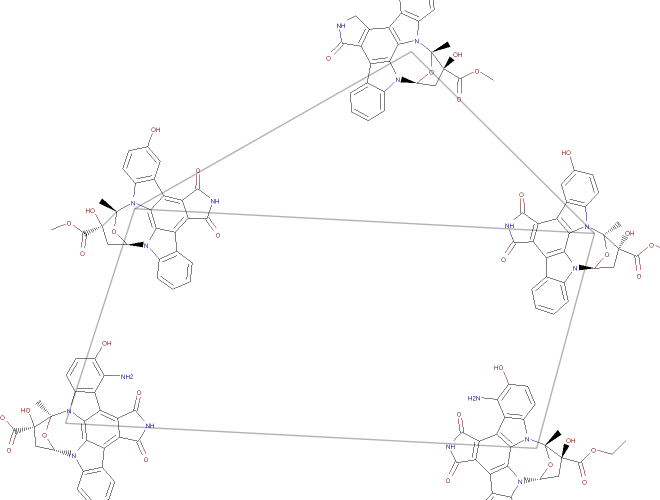

In [41]:
g = sortGlist[1][0]
pos = nx.spring_layout(g)
f.plot_with_figure(g, pos, Cnlist1)